# Human Activity Recognition - Starter Model

The purpose of this notebook is to get you started to solve this problem.

The main steps of any Data Science Project can be roughly jotted as follows:

* Data Exploration
* Data Visualization
* Data Preprocessing
* Feature Engineering
* Modelling
* Validation, Evaluation, Testing

These steps overlap in multiple places and serve only as a guide to loosely follow.

Let's start by importing common data science packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization advanced

# Loading the Data

In [2]:
df_train = pd.read_csv('../input/da-coaching-human-activity/train.csv')
df_test = pd.read_csv('../input/da-coaching-human-activity/test.csv')

In [3]:
df_train.head()

,Id,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,2,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,3,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,4,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,5,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
df_test.head()

,Id,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,1,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,...,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2
1,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,...,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2
2,3,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,...,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2
3,4,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,...,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2
4,5,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,...,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2


In [5]:
df_train.shape

(7352, 564)

In [6]:
df_test.shape

(2947, 563)

With so many features, it would be impossible to see the plots for all. \
We will limit our exploration to get a basic understanding of what is happening.

# Data Exploration

#### 1. How many features are there? What are their datatypes?

In [7]:
df_train.shape

(7352, 564)

There are 564 features

In [8]:
df_train.dtypes.value_counts()

float64    561
int64        2
object       1
dtype: int64

In [9]:
df_train.select_dtypes('int64').head(3)

,Id,subject
0,1,1
1,2,1
2,3,1


In [10]:
df_train.select_dtypes('object').head(3)

,Activity
0,STANDING
1,STANDING
2,STANDING


So there are 561 floats, 2 integers and 1 object. \
Of which the 2 integers (Id and Subject) aren't relevant for predictions. \
The 1 object is the Activity (target) that is to be predicted. \
Remaining all 561 features are real values from sensor data.

#### 2. Summarize the features

In [11]:
import re

Looking at some of the names of the features, it seems that these are derived features from raw sensor data. \
The features starting with small 't' are time-domain features.\
The features starting with small 'f' are frequency-domain features.

In [12]:
columns = df_train.columns.to_numpy()

In [13]:
time_feats = []
time_func = set()
freq_feats = []
freq_func = set()
other_feats = []

n_time = 0
n_freq = 0
n_other = 0

regex_func = re.compile('-([a-z]+)')
regex_axis = re.compile('-([A-Z])')

for i in range(564):
    if np.char.startswith(columns[i],'t'):
        time_feats.append(columns[i])
        time_func.add(regex_func.findall(columns[i])[0])
        n_time += 1
    elif np.char.startswith(columns[i],'f'):
        freq_feats.append(columns[i])
        freq_func.add(regex_func.findall(columns[i])[0])
        n_freq += 1
    else:
        other_feats.append(columns[i])
        n_other += 1

In [14]:
print('Time freatures:',sorted(time_func))
print('Frequency freatures:',sorted(freq_func))

Time freatures: ['ar', 'correlation', 'energy', 'entropy', 'iqr', 'mad', 'max', 'mean', 'min', 'sma', 'std']
Frequency freatures: ['bands', 'energy', 'entropy', 'iqr', 'kurtosis', 'mad', 'max', 'mean', 'min', 'skewness', 'sma', 'std']


In [15]:
print('Other features:',sorted(other_feats))

Other features: ['Activity', 'Id', 'angle(X,gravityMean)', 'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'angle(tBodyAccJerkMean),gravityMean)', 'angle(tBodyAccMean,gravity)', 'angle(tBodyGyroJerkMean,gravityMean)', 'angle(tBodyGyroMean,gravityMean)', 'subject']


In [16]:
n_time, n_freq, n_other, n_time + n_freq + n_other

(265, 289, 10, 564)

#### 3. Is the target balanced?

In [17]:
df_train['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

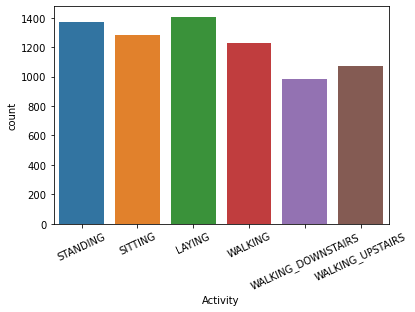

In [18]:
chart = sns.countplot(df_train['Activity'])
t = chart.set_xticklabels(chart.get_xticklabels(),rotation=25)

Seems pretty much balanced.


#### 4. Which features are important?

In [19]:
act_map = {'STANDING':0, 'SITTING':1, 'LAYING':2, 'WALKING':3, 'WALKING_DOWNSTAIRS':4, 'WALKING_UPSTAIRS':5}
df_train['activity_code'] = df_train['Activity'].map(act_map)

In [20]:
df_train['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [21]:
df_train['activity_code'].value_counts()

2    1407
0    1374
1    1286
3    1226
5    1073
4     986
Name: activity_code, dtype: int64

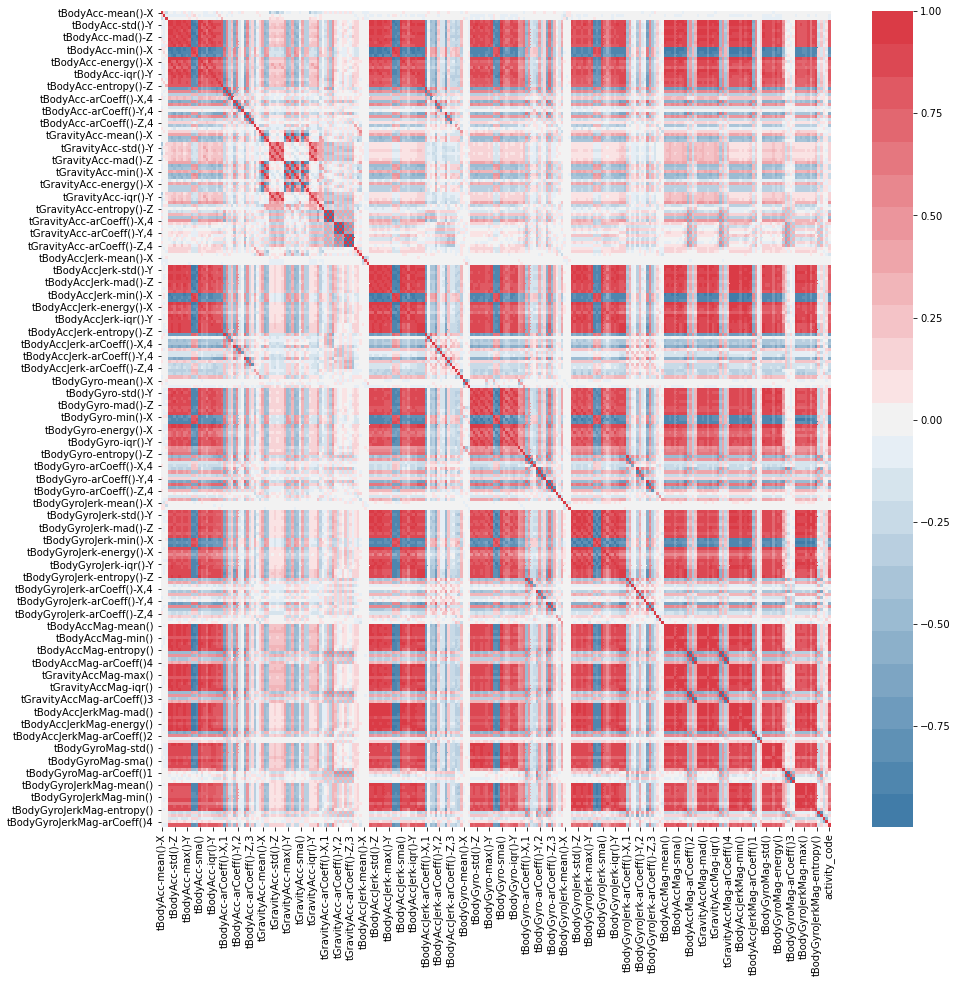

In [22]:
fig, ax = plt.subplots(1,1, figsize=(15,15))
sns.heatmap(df_train[time_feats+['activity_code']].corr(), 
            cmap=sns.diverging_palette(240, 10, n=25), 
            cbar=True,ax=ax)

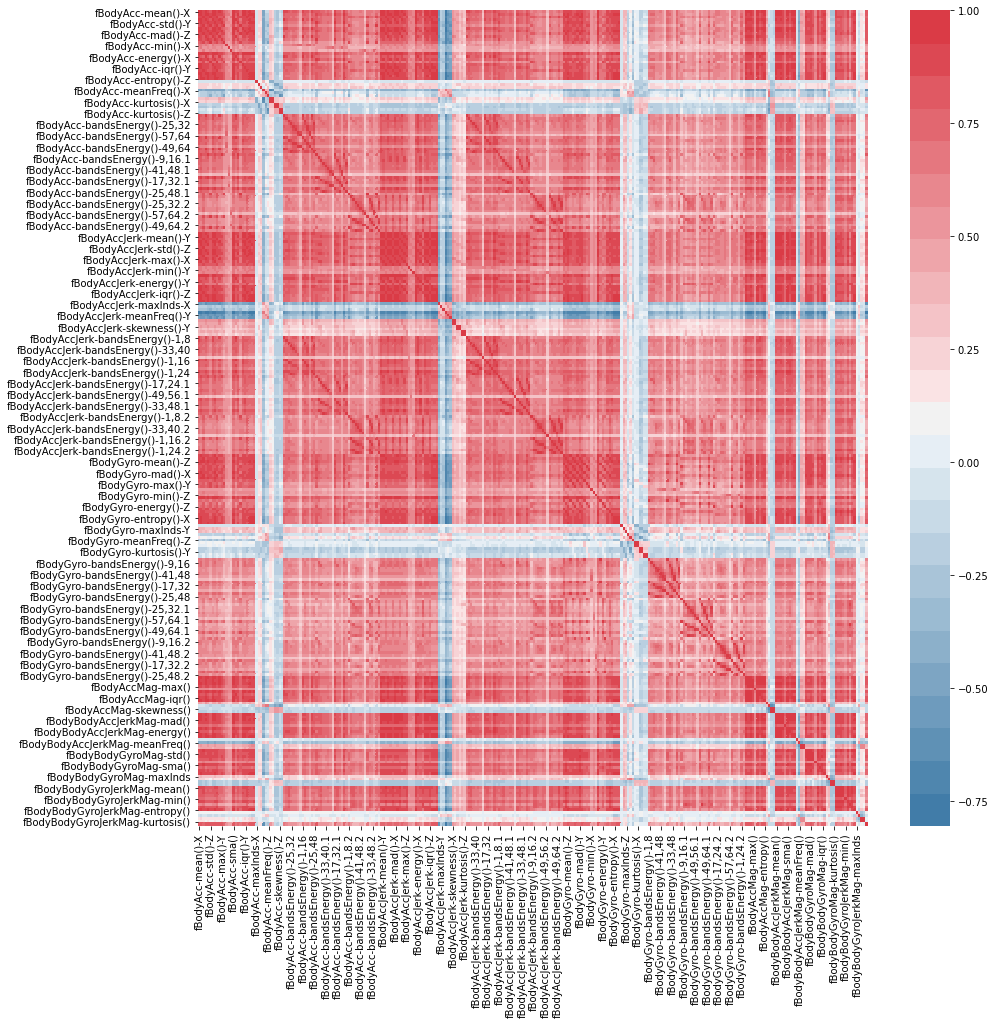

In [23]:
fig, ax = plt.subplots(1,1, figsize=(15,15))
sns.heatmap(df_train[freq_feats+['activity_code']].corr(), 
            cmap=sns.diverging_palette(240, 10, n=25), 
            cbar=True,ax=ax)

# Modelling

In [24]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

Let's come up with a quick base model before further exploring the data. \
Firstly, let's remove Id, subject, Activity from the data.

In [25]:
df_train.drop(columns=['Id', 'subject', 'Activity'], inplace=True)

In [26]:
y = df_train.pop('activity_code')
X = df_train

In [27]:
X.shape, y.shape

((7352, 561), (7352,))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [29]:
X_train.shape, y_train.shape

((5881, 561), (5881,))

In [30]:
X_test.shape, y_test.shape

((1471, 561), (1471,))

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import classification_report

Let's do feature standardization before training the models

In [32]:
std_scaler = StandardScaler()
X_prep_train = std_scaler.fit_transform(X_train)
X_prep_test = std_scaler.transform(X_test)

Training the models

In [33]:
LR_clf = LogisticRegression()
LR_clf.fit(X_prep_train, y_train)

y_pred = LR_clf.predict(X_prep_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1099
           1       0.99      0.99      0.99      1029
           2       1.00      1.00      1.00      1125
           3       1.00      1.00      1.00       981
           4       1.00      1.00      1.00       789
           5       1.00      1.00      1.00       858

    accuracy                           1.00      5881
   macro avg       1.00      1.00      1.00      5881
weighted avg       1.00      1.00      1.00      5881



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**WOW**

Let's check for validation data

In [34]:
from sklearn.model_selection import cross_val_score, KFold

In [35]:
kfold = KFold(n_splits=5)

In [36]:
scores = cross_val_score(LR_clf, X_prep_train, y_train, scoring='accuracy', cv=kfold)
print('Scores:',scores)
print('Mean:',np.mean(scores))
print('Std:',np.std(scores))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Scores: [0.98215803 0.98469388 0.98044218 0.97534014 0.98214286]
Mean: 0.9809554153012096
Std: 0.003118562882585337


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Amazing** \
How about on the test set?

In [37]:
y_pred = LR_clf.predict(X_prep_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       275
           1       0.97      0.97      0.97       257
           2       1.00      1.00      1.00       282
           3       1.00      1.00      1.00       245
           4       0.99      0.99      0.99       197
           5       0.99      0.99      0.99       215

    accuracy                           0.99      1471
   macro avg       0.99      0.99      0.99      1471
weighted avg       0.99      0.99      0.99      1471



**Superb**

# Testing

Given the excellent results here, let's try to submit a solution and see what score we get on the test set.

In [38]:
df_test.drop(columns=['Id', 'subject'], inplace=True)

In [39]:
X_final_test = df_test

In [40]:
X_final_prep_test = std_scaler.transform(X_final_test)

In [41]:
y_final_pred = LR_clf.predict(X_final_prep_test)

In [42]:
y_final_pred

array([0, 0, 0, ..., 5, 5, 5])

In [43]:
rev_act_map = {0:'STANDING', 1:'SITTING', 2:'LAYING', 3:'WALKING', 4:'WALKING_DOWNSTAIRS', 5:'WALKING_UPSTAIRS'}
y_final = [rev_act_map[code] for code in y_final_pred]

In [44]:
submission = pd.DataFrame({
        "Id": range(1,len(y_final)+1),
        "Activity": y_final
    })

submission.to_csv('lr_sub.csv',index=False)

In [45]:
submission.head()

,Id,Activity
0,1,STANDING
1,2,STANDING
2,3,STANDING
3,4,STANDING
4,5,STANDING
